In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [92]:
#Twitter data set
tweets_df = pd.read_csv('tweets.csv')

#Stock Market Dataset
market_df = pd.read_csv('Stock Market Dataset.csv')

In [93]:
tweets_df = tweets_df[['date', 'sentiment_label']]

In [94]:
market_df = market_df[['Date', 'Bitcoin_Price', 'Bitcoin_Vol.']]

In [95]:
#Checking dataset 

print(tweets_df.head())
print(market_df.head())

                      date sentiment_label
0  2022-01-01 00:00:00.000         Neutral
1  2022-01-01 00:00:00.000         Neutral
2  2022-01-01 00:00:00.000         Neutral
3  2022-01-01 00:00:00.000        Negative
4  2022-01-01 00:00:00.000        Positive
         Date Bitcoin_Price  Bitcoin_Vol.
0  02-02-2024     43,194.70       42650.0
1  01-02-2024     43,081.40       47690.0
2  31-01-2024     42,580.50       56480.0
3  30-01-2024     42,946.20       55130.0
4  29-01-2024     43,299.80       45230.0


In [96]:
#Converting date to correct format for visualising proccess
market_df['Date'] = pd.to_datetime(market_df['Date'], format='%d-%m-%Y')

tweets_df['date'] = pd.to_datetime(tweets_df['date'])

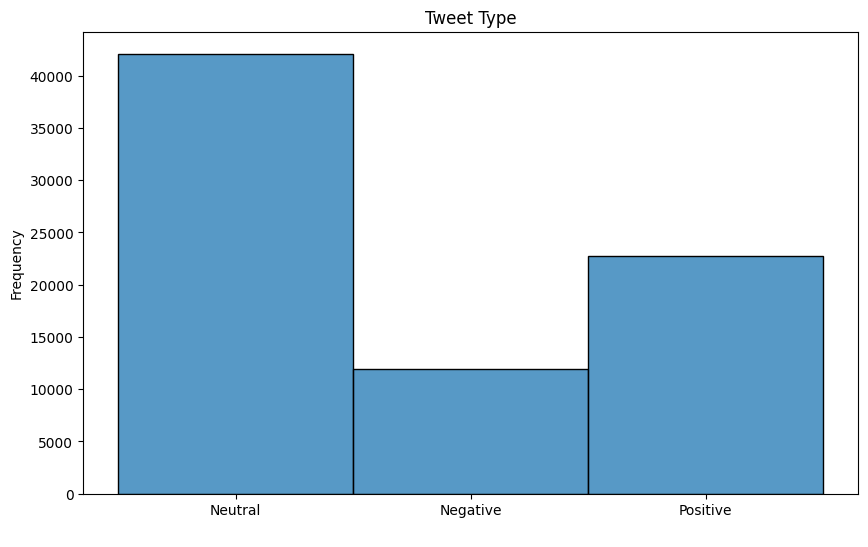

In [97]:
#Distribution of neutral, positive, and negative tweets related with bitcoin 

#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['sentiment_label'])  
plt.title('Tweet Type')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

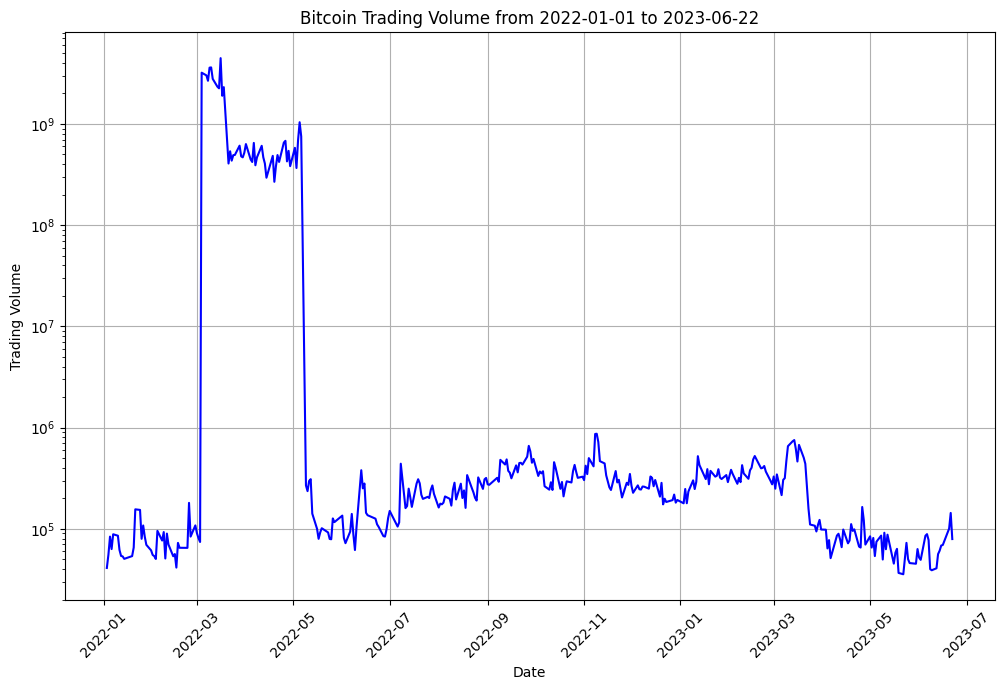

In [98]:
#The date range where two data sets intersect 

filtered_data_bitcoin_volume = market_df[
    (market_df['Date'] >= '2022-01-01') & (market_df['Date'] <= '2023-06-22')
]


#Marking NaN values
filtered_data_bitcoin_volume = filtered_data_bitcoin_volume[
    filtered_data_bitcoin_volume['Bitcoin_Vol.'].notna() & 
    (filtered_data_bitcoin_volume['Bitcoin_Vol.'] > 0)
]


#Visualise graph 
plt.figure(figsize=(10, 7))
plt.plot(filtered_data_bitcoin_volume['Date'], filtered_data_bitcoin_volume['Bitcoin_Vol.'], color='blue', linestyle='-')
plt.title('Bitcoin Trading Volume from 2022-01-01 to 2023-06-22')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.yscale('log')
plt.show()

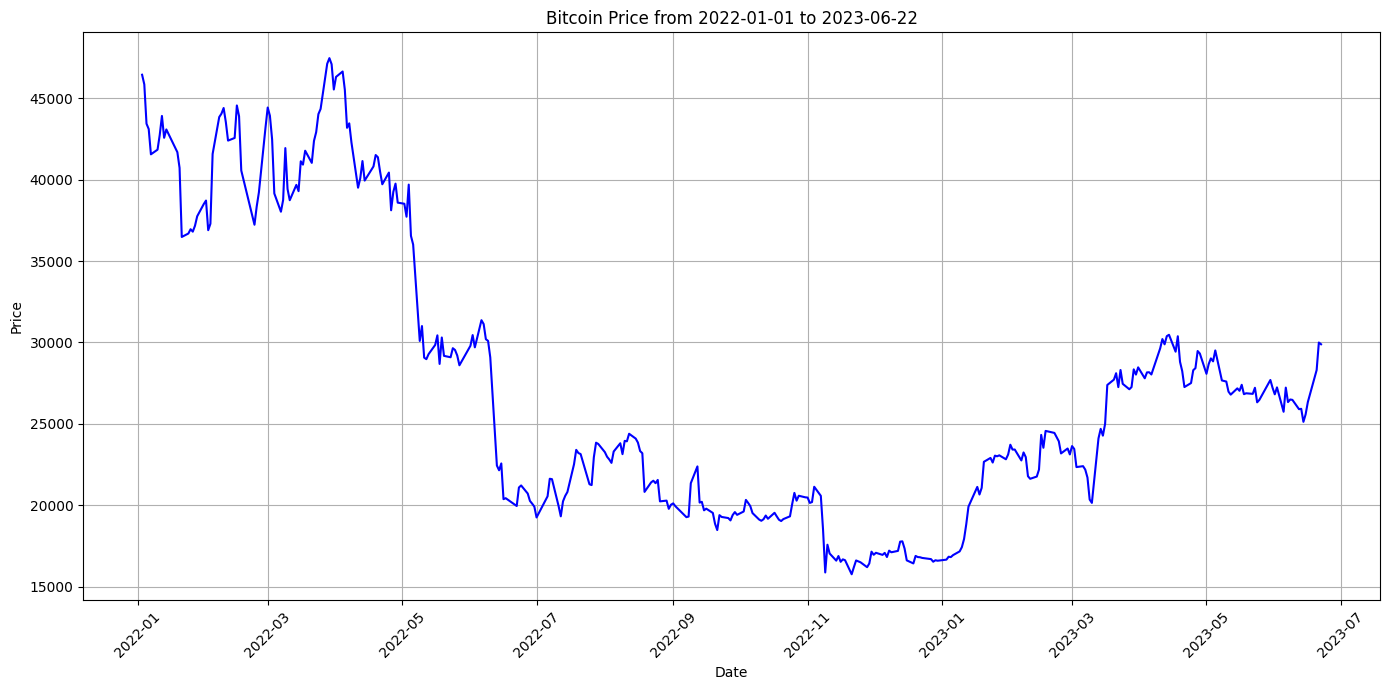

In [99]:
#Convert Price to Float  

market_df['Bitcoin_Price'] = market_df['Bitcoin_Price'].replace(',', '', regex=True).astype(float)
filtered_data_bitcoin_price = market_df[
    (market_df['Date'] >= '2022-01-01') & (market_df['Date'] <= '2023-06-22')
]

#Marking NaN values
filtered_data_bitcoin_price = filtered_data_bitcoin_price[
    filtered_data_bitcoin_price['Bitcoin_Price'].notna() & 
    (filtered_data_bitcoin_price['Bitcoin_Price'] > 0)
]

#Visualize Graph 
plt.figure(figsize=(14, 7))
plt.plot(filtered_data_bitcoin_price['Date'], filtered_data_bitcoin_price['Bitcoin_Price'], color='blue', linestyle='-')
plt.title('Bitcoin Price from 2022-01-01 to 2023-06-22')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

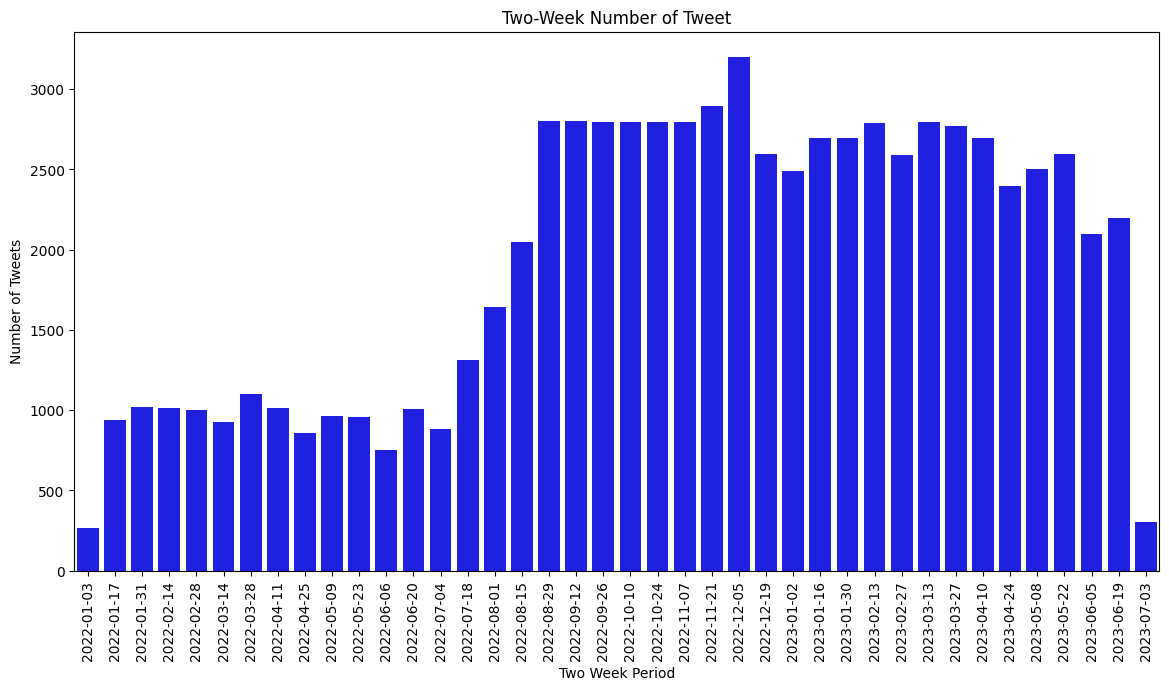

In [100]:
#Tweet number for bitcoin(two week period)

#Calculate total tweet
biweekly_tweets = tweets_df.resample('2W-Mon', on='date').size()
biweekly_tweets_df = pd.DataFrame(biweekly_tweets, columns=['tweet_count'])

#Visualize
plt.figure(figsize=(14, 7))
sns.barplot(x=biweekly_tweets_df.index.date, y='tweet_count', data=biweekly_tweets_df, color='blue')
plt.xticks(rotation=90)  
plt.title('Two-Week Number of Tweet')
plt.xlabel('Two Week Period')
plt.ylabel('Number of Tweets')
plt.show()

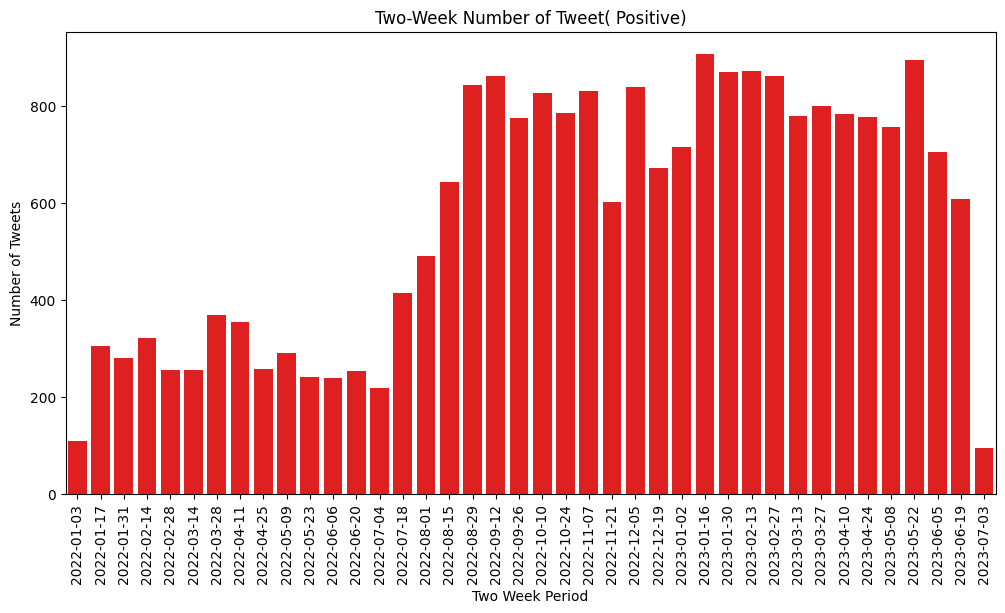

In [101]:
#Positive Tweet number for bitcoin(two week period)

positive_tweets = tweets_df[(tweets_df['sentiment_label'] != 'Neutral') & (tweets_df['sentiment_label'] != 'Negative')]
biweekly_tweets_positive = positive_tweets.resample('2W-Mon', on='date').size()

#Calculate positive
biweekly_tweets_positive = pd.DataFrame(biweekly_tweets_positive, columns=['tweet_count'])

#Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=biweekly_tweets_positive.index.date, y='tweet_count', data=biweekly_tweets_positive, color='red')
plt.xticks(rotation=90)  
plt.title('Two-Week Number of Tweet( Positive)')
plt.xlabel('Two Week Period')
plt.ylabel('Number of Tweets')
plt.show()

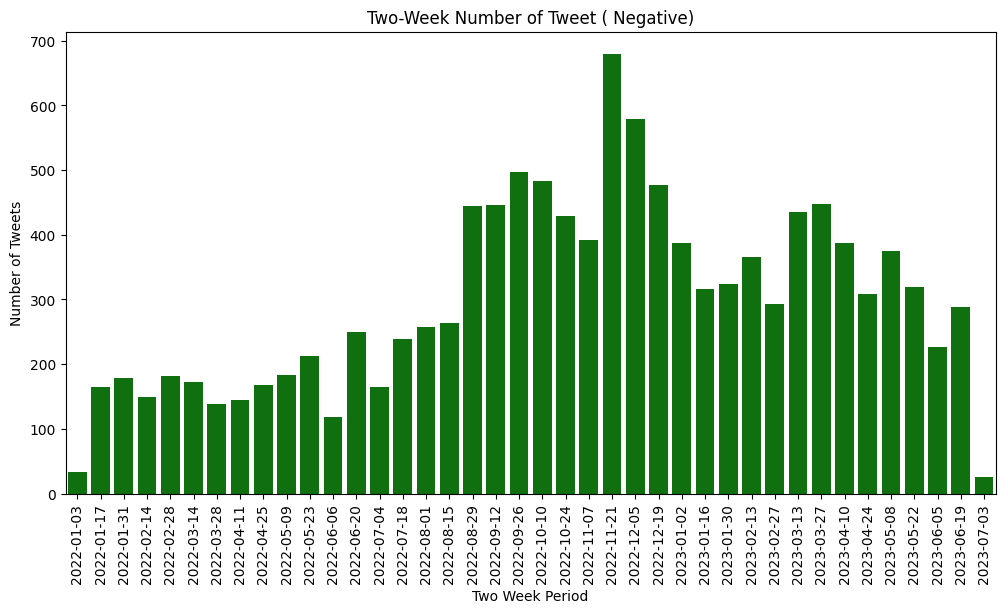

In [102]:
#Negative Tweet number for bitcoin(two week period)

negative_tweets = tweets_df[(tweets_df['sentiment_label'] != 'Neutral') & (tweets_df['sentiment_label'] != 'Positive')]
biweekly_tweets_negative = negative_tweets.resample('2W-Mon', on='date').size()

biweekly_tweets_negative = pd.DataFrame(biweekly_tweets_negative, columns=['tweet_count'])

plt.figure(figsize=(12, 6))
sns.barplot(x=biweekly_tweets_negative.index.date, y='tweet_count', data=biweekly_tweets_negative, color='green')
plt.xticks(rotation=90)  
plt.title('Two-Week Number of Tweet ( Negative)')
plt.xlabel('Two Week Period')
plt.ylabel('Number of Tweets')
plt.show()

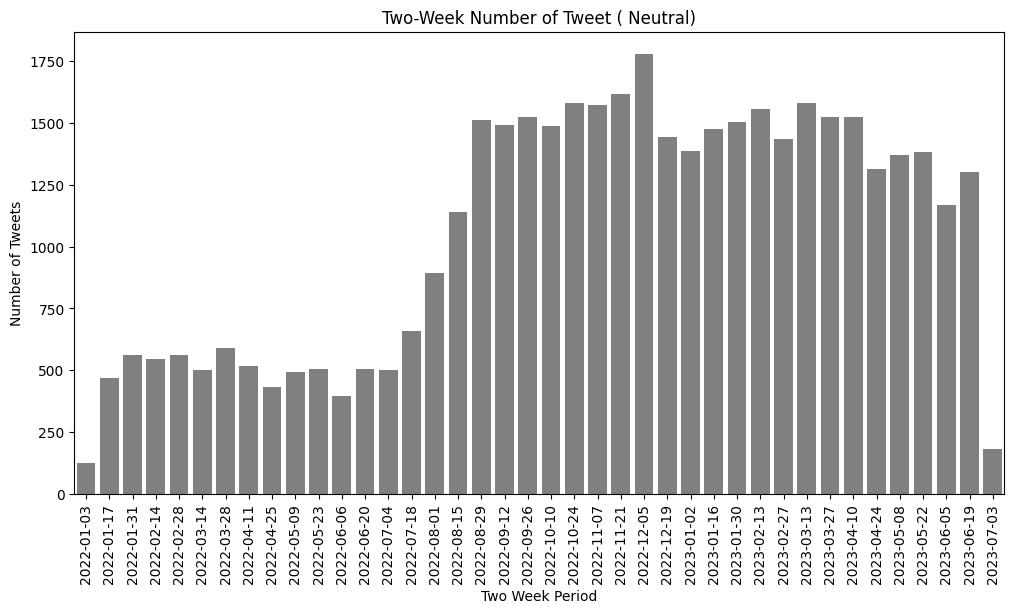

In [103]:
#Neutral Tweet number for bitcoin(two week period)

neutral_tweets = tweets_df[(tweets_df['sentiment_label'] != 'Negative') & (tweets_df['sentiment_label'] != 'Positive')]
biweekly_tweets_neutral = neutral_tweets.resample('2W-Mon', on='date').size()

biweekly_tweets_neutral = pd.DataFrame(biweekly_tweets_neutral, columns=['tweet_count'])

plt.figure(figsize=(12, 6))
sns.barplot(x=biweekly_tweets_neutral.index.date, y='tweet_count', data=biweekly_tweets_neutral, color='grey')
plt.xticks(rotation=90)  
plt.title('Two-Week Number of Tweet ( Neutral)')
plt.xlabel('Two Week Period')
plt.ylabel('Number of Tweets')
plt.show()

Correlation Matrix:
               Bitcoin_Price  Bitcoin_Vol.  total_tweets
Bitcoin_Price       1.000000      0.389087     -0.697627
Bitcoin_Vol.        0.389087      1.000000     -0.314209
total_tweets       -0.697627     -0.314209      1.000000


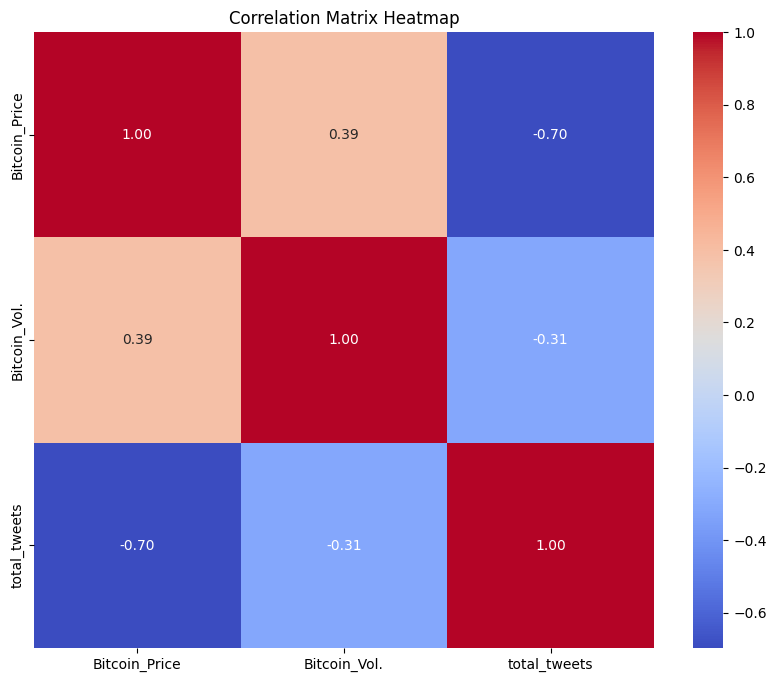

In [104]:
#Arrange intersecting date range 

start_date = '2022-01-01'
end_date = '2023-06-22'

#Convert Price value to correct format(float)
market_df['Bitcoin_Price'] = market_df['Bitcoin_Price'].replace(',', '', regex=True).astype(float)

daily_tweets = tweets_df.groupby('date').size()
daily_tweets_df = pd.DataFrame(daily_tweets, columns=['total_tweets'])
daily_tweets_df.index = pd.to_datetime(daily_tweets_df.index)

market_df_filtered = market_df[(market_df['Date'] >= start_date) & (market_df['Date'] <= end_date)]
daily_tweets_df_filtered = daily_tweets_df[(daily_tweets_df.index >= start_date) & (daily_tweets_df.index <= end_date)]

combined_df = pd.merge(market_df_filtered, daily_tweets_df_filtered, left_on='Date', right_index=True, how='inner')

#Finding correlation Between  PRICE, VOLUME, and TWEET NUMBER

correlation_matrix = combined_df[['Bitcoin_Price', 'Bitcoin_Vol.', 'total_tweets']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

#Visualize heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


Correlation Matrix:
                 Bitcoin_Price  Bitcoin_Vol.  positive_tweets  \
Bitcoin_Price         1.000000      0.389087        -0.581629   
Bitcoin_Vol.          0.389087      1.000000        -0.287304   
positive_tweets      -0.581629     -0.287304         1.000000   
negative_tweets      -0.625158     -0.238865         0.562785   
neutral_tweets       -0.693827     -0.312026         0.863943   

                 negative_tweets  neutral_tweets  
Bitcoin_Price          -0.625158       -0.693827  
Bitcoin_Vol.           -0.238865       -0.312026  
positive_tweets         0.562785        0.863943  
negative_tweets         1.000000        0.734973  
neutral_tweets          0.734973        1.000000  


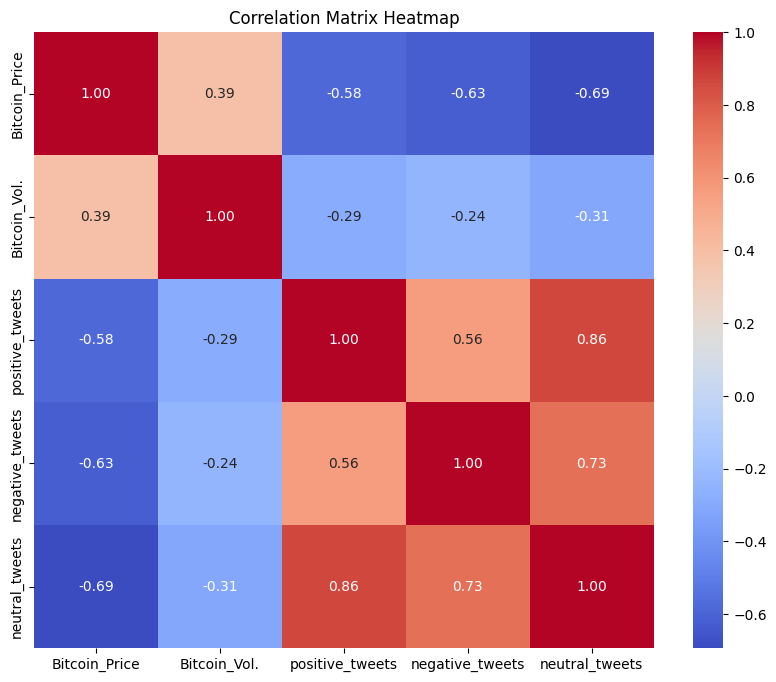

In [105]:
#Arrange intersecting date range 

start_date = '2022-01-01'
end_date = '2023-06-22'


#Calculates the number of tweets with specific sentiment label

positive_tweets = tweets_df[tweets_df['sentiment_label'] == 'Positive'].groupby('date').size()
negative_tweets = tweets_df[tweets_df['sentiment_label'] == 'Negative'].groupby('date').size()
neutral_tweets = tweets_df[tweets_df['sentiment_label'] == 'Neutral'].groupby('date').size()

positive_tweets_df = pd.DataFrame(positive_tweets, columns=['positive_tweets'])
negative_tweets_df = pd.DataFrame(negative_tweets, columns=['negative_tweets'])
neutral_tweets_df = pd.DataFrame(neutral_tweets, columns=['neutral_tweets'])

positive_tweets_df.index = pd.to_datetime(positive_tweets_df.index)
negative_tweets_df.index = pd.to_datetime(negative_tweets_df.index)
neutral_tweets_df.index = pd.to_datetime(neutral_tweets_df.index)

#Filtered dataset according to their date 

positive_tweets_filtered = positive_tweets_df[(positive_tweets_df.index >= start_date) & (positive_tweets_df.index <= end_date)]
negative_tweets_filtered = negative_tweets_df[(negative_tweets_df.index >= start_date) & (negative_tweets_df.index <= end_date)]
neutral_tweets_filtered = neutral_tweets_df[(neutral_tweets_df.index >= start_date) & (neutral_tweets_df.index <= end_date)]

#Combined datas
combined_df = pd.merge(combined_df, positive_tweets_filtered, left_on='Date', right_index=True, how='left')
combined_df = pd.merge(combined_df, negative_tweets_filtered, left_on='Date', right_index=True, how='left')
combined_df = pd.merge(combined_df, neutral_tweets_filtered, left_on='Date', right_index=True, how='left')

combined_df['positive_tweets'].fillna(0, inplace=True)
combined_df['negative_tweets'].fillna(0, inplace=True)
combined_df['neutral_tweets'].fillna(0, inplace=True)

#Finding correlation Between  PRICE, VOLUME, and TWEET NUMBER (for all type seperately)

correlation_matrix = combined_df[['Bitcoin_Price', 'Bitcoin_Vol.', 'positive_tweets', 'negative_tweets', 'neutral_tweets']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


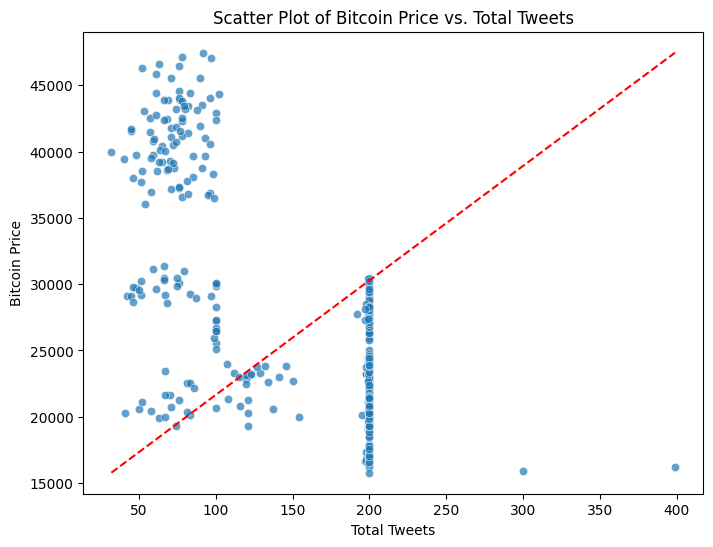

Correlation Coefficient: -0.6976265110346607
P-value: 3.1816876073018133e-54
The Null Hypothesis is rejected: A correlation is evident.
This indicates that a potential relationship exists between Bitcoin Price and number of tweets.


In [106]:
from scipy.stats import pearsonr
import seaborn as sns

#Date range
start_date = '2022-01-01'
end_date = '2023-06-22'

filtered_df = combined_df[(combined_df['Date'] >= start_date) & (combined_df['Date'] <= end_date)]

#Creating subset
selected_columns = ['Bitcoin_Price', 'total_tweets']
subset_df = filtered_df[selected_columns].copy()

#Correcting Floats
subset_df['Bitcoin_Price'] = pd.to_numeric(subset_df['Bitcoin_Price'], errors='coerce').astype(float)
subset_df['total_tweets'] = pd.to_numeric(subset_df['total_tweets'], errors='coerce').astype(float)
subset_df = subset_df.dropna()

#Visualized Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='total_tweets', y='Bitcoin_Price', alpha=0.7)

plt.plot([min(subset_df['total_tweets']), max(subset_df['total_tweets'])],
         [min(subset_df['Bitcoin_Price']), max(subset_df['Bitcoin_Price'])],
         color='red', linestyle='--')
 
plt.title('Scatter Plot of Bitcoin Price vs. Total Tweets')
plt.xlabel('Total Tweets')
plt.ylabel('Bitcoin Price')
plt.show()

#Correlation Coefficient Calculation 
correlation_coefficient, p_value = pearsonr(subset_df['Bitcoin_Price'], subset_df['total_tweets'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

#Checking the correlation between price and tweets 
#Finalize hypothesis reject or not 

alpha = 0.05
if p_value < alpha:
    print("The Null Hypothesis is rejected: A correlation is evident.")
    print("This indicates that a potential relationship exists between Bitcoin Price and number of tweets.")
else:
    print("The null hypothesis is not rejected: No correlation is evident.")
    print("This indicates that a significant relationship may not exist between Bitcoin Price and number of tweets.")


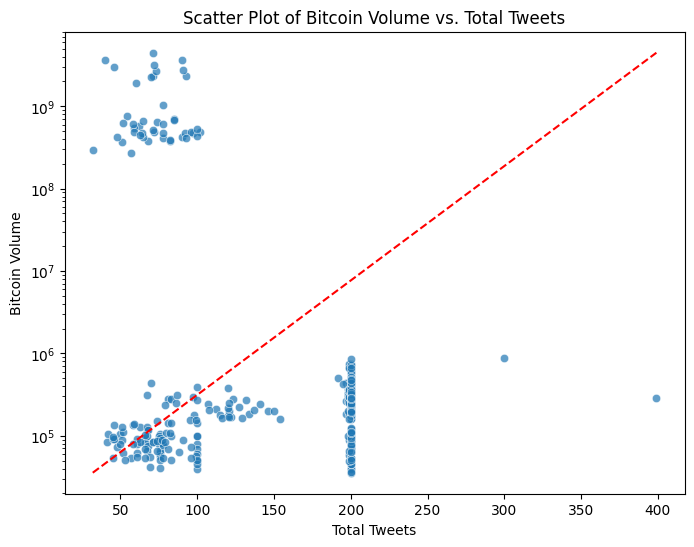

Correlation Coefficient: -0.3142087659518933
P-value: 9.26651443475509e-10
The Null Hypothesis is rejected: A correlation is evident.
This indicates that a potential relationship exists between Bitcoin Volume and number of tweets.


In [107]:
from scipy.stats import pearsonr
import seaborn as sns
#Date Range
start_date = '2022-01-01'
end_date = '2023-06-22'

filtered_df = combined_df[(combined_df['Date'] >= start_date) & (combined_df['Date'] <= end_date)]

#Creating subset
selected_columns = ['Bitcoin_Vol.', 'total_tweets']
subset_df = filtered_df[selected_columns].copy()

#Correcting float
subset_df['Bitcoin_Vol'] = pd.to_numeric(subset_df['Bitcoin_Vol.'], errors='coerce').astype(float)
subset_df['total_tweets'] = pd.to_numeric(subset_df['total_tweets'], errors='coerce').astype(float)
subset_df = subset_df.dropna()

#Visualize ScatterPlot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='total_tweets', y='Bitcoin_Vol.', alpha=0.7)

plt.plot([min(subset_df['total_tweets']), max(subset_df['total_tweets'])],
         [min(subset_df['Bitcoin_Vol.']), max(subset_df['Bitcoin_Vol.'])],
         color='red', linestyle='--')

plt.title('Scatter Plot of Bitcoin Volume vs. Total Tweets')
plt.xlabel('Total Tweets')
plt.ylabel('Bitcoin Volume')
plt.yscale('log')
plt.show()

#Correlation Coefficient Calculation 
correlation_coefficient, p_value = pearsonr(subset_df['Bitcoin_Vol.'], subset_df['total_tweets'])

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

#Checking the correlation between volume and tweets 
#Finalize hypothesis reject or not 
alpha = 0.05
if p_value < alpha:
    print("The Null Hypothesis is rejected: A correlation is evident.")
    print("This indicates that a potential relationship exists between Bitcoin Volume and number of tweets.")
else:
    print("The null hypothesis is not rejected: No correlation is evident.")
    print("This indicates that a significant relationship may not exist between Bitcoin Volume and number of tweets.")


Mean Squared Error: 38777745.27794122


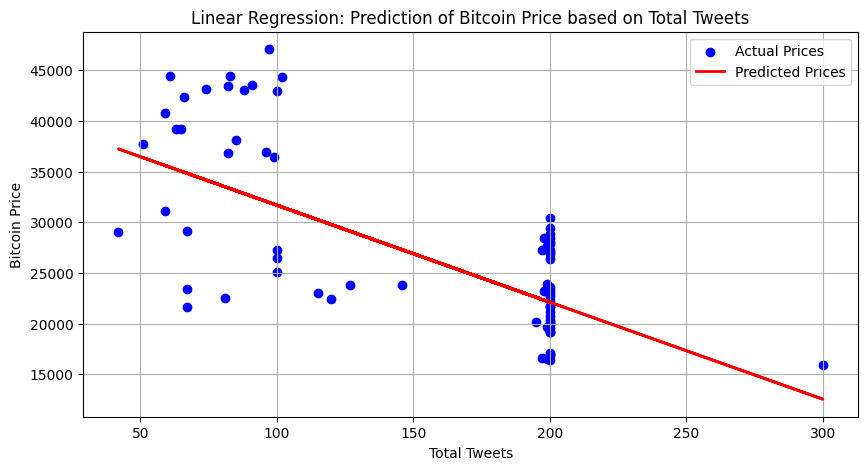

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Creating a linear regression model to predict bitcoin price

market_df['Date'] = pd.to_datetime(market_df['Date'])

start_date = '2022-01-01'
end_date = '2023-06-22'
filtered_df = market_df[(market_df['Date'] >= start_date) & (market_df['Date'] <= end_date)]


daily_tweets = tweets_df.groupby('date').size()
daily_tweets_df = pd.DataFrame(daily_tweets, columns=['total_tweets'])
daily_tweets_df.index = pd.to_datetime(daily_tweets_df.index)


#Combined two dataset
combined_df = pd.merge(filtered_df, daily_tweets_df, left_on='Date', right_index=True, how='inner')


#drop NaN 
combined_df = combined_df.dropna(subset=['Bitcoin_Price', 'total_tweets'])

X = combined_df[['total_tweets']]
y = combined_df['Bitcoin_Price']  

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

#Predict on test dataset
y_pred = model.predict(X_test)

#Calclute mse
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Visualize and predict prices 
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Prediction of Bitcoin Price based on Total Tweets')
plt.xlabel('Total Tweets')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 4.2638781259742776e+16


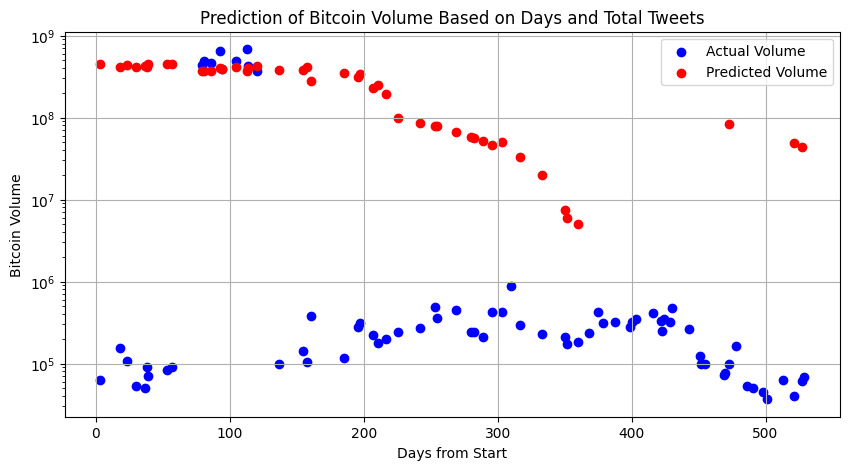

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Convert date to date time 
market_df['Date'] = pd.to_datetime(market_df['Date'])

#Date range
start_date = '2022-01-01'
end_date = '2023-06-22'
filtered_df = market_df[(market_df['Date'] >= start_date) & (market_df['Date'] <= end_date)].copy()


filtered_df.loc[:, 'Days'] = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days

#Group daily tweet time 
daily_tweets = tweets_df.groupby('date').size()
daily_tweets_df = pd.DataFrame(daily_tweets, columns=['total_tweets'])
daily_tweets_df.index = pd.to_datetime(daily_tweets_df.index)

#Merge dataSet 
combined_df = pd.merge(filtered_df, daily_tweets_df, left_on='Date', right_index=True, how='inner')

#Drop NaN 
combined_df = combined_df.dropna(subset=['Bitcoin_Vol.', 'total_tweets'])

#Define input
X = combined_df[['Days', 'total_tweets']] 
y = combined_df['Bitcoin_Vol.'] 

#Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

#Predict 
y_pred = model.predict(X_test)

#Calclute mse
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Visualize and predict prices 
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Days'], y_test, color='blue', label='Actual Volume')
plt.scatter(X_test['Days'], y_pred, color='red', label='Predicted Volume')
plt.title('Prediction of Bitcoin Volume Based on Days and Total Tweets')
plt.xlabel('Days from Start')
plt.ylabel('Bitcoin Volume')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


Mean Squared Error: 37466861.800152384


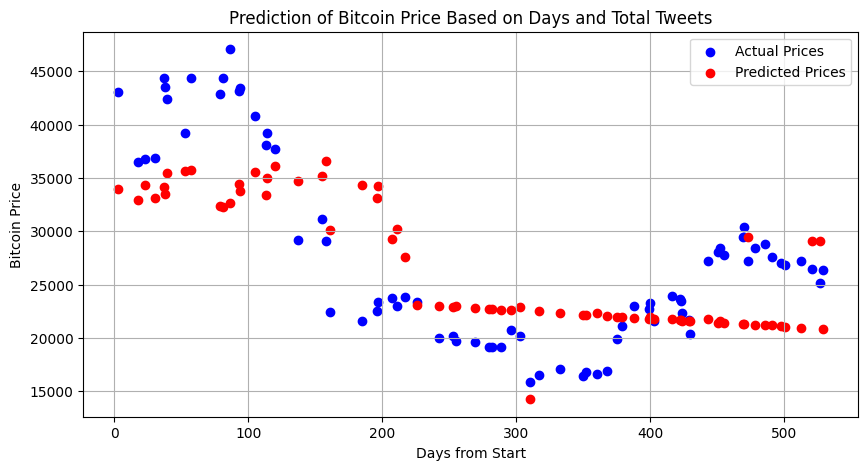

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Convert date to date time 
market_df['Date'] = pd.to_datetime(market_df['Date'])

#Date range
start_date = '2022-01-01'
end_date = '2023-06-22'
filtered_df = market_df[(market_df['Date'] >= start_date) & (market_df['Date'] <= end_date)].copy()

filtered_df['Days'] = (filtered_df['Date'] - filtered_df['Date'].min()).dt.days

#Group daily tweet time 
daily_tweets = tweets_df.groupby('date').size()
daily_tweets_df = pd.DataFrame(daily_tweets, columns=['total_tweets'])
daily_tweets_df.index = pd.to_datetime(daily_tweets_df.index)

combined_df = pd.merge(filtered_df, daily_tweets_df, left_on='Date', right_index=True, how='inner')

#Merge dataSet 
combined_df.dropna(subset=['Bitcoin_Price', 'total_tweets'], inplace=True)

#Define input
X = combined_df[['Days', 'total_tweets']]
y = combined_df['Bitcoin_Price']

#Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

#Predict 
y_pred = model.predict(X_test)

#Calclute mse
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


#Visualize and predict prices 
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Days'], y_test, color='blue', label='Actual Prices') 
plt.scatter(X_test['Days'], y_pred, color='red', label='Predicted Prices') 
plt.title('Prediction of Bitcoin Price Based on Days and Total Tweets')
plt.xlabel('Days from Start')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.grid(True)
plt.show()



In [2]:
#Step 3:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [31]:
#Load tweet dataset
tweets_data = pd.read_csv('tweets.csv')

#Load and correcting stock dataset
stock_data = pd.read_csv('Stock Market Dataset.csv')
stock_data['Bitcoin_Price'] = stock_data['Bitcoin_Price'].replace(',', '', regex=True).astype(float)

In [32]:
#Checking and controling datasets

print(stock_data.head())
print(stock_data.info())
print(tweets_data.head())
print(tweets_data.info())


   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN        43194.7   
1            73.82        577940.0        3.8535          NaN        43081.4   
2            75.85        344490.0        3.9060          NaN        42580.5   
3            77.82        347240.0        3.9110          NaN        42946.2   
4            76.78        331930.0        3.8790          NaN        43299.8   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...        5,89,498         10580.0

In [33]:
#Converting date to correct format
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data.rename(columns={'date': 'Date'}, inplace=True)

#Specify dataset with desirable datas 

stock_data=stock_data[['Date', 'Bitcoin_Price', 'Bitcoin_Vol.']]
tweets_data['Total_Tweets'] = tweets_data.groupby(tweets_data['Date'].dt.date)['Date'].transform('count')
tweets_data = tweets_data.drop_duplicates(subset=['Date'])
tweets_data=tweets_data[['Date', 'Total_Tweets']]

#Determine date range
start_date = '2022-01-01'
end_date = '2023-06-22'

stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
tweets_data = tweets_data[(tweets_data['Date'] >= start_date) & (tweets_data['Date'] <= end_date)]

#Determine intersect dates
common_dates = set(stock_data['Date']).intersection(set(tweets_data['Date']))
stock_data = stock_data[stock_data['Date'].isin(common_dates)].reset_index(drop=True)
tweets_data = tweets_data[tweets_data['Date'].isin(common_dates)].reset_index(drop=True)


merged_data=pd.merge(stock_data, tweets_data[['Date', 'Total_Tweets']], on='Date', how='left')
merged_data.fillna(0, inplace=True)





In [34]:
#Determine Feature and Target values 

X = merged_data[['Bitcoin_Price']]
y = merged_data['Total_Tweets']

X1 = merged_data[['Total_Tweets']]
y1 = merged_data['Bitcoin_Price']


#Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Scale the sets (Not necessary. For increase accuracy)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)




In [35]:
#KNN
#Determine range for possible k values 

k_values = range(1, 31)
knn_errors=[]

#Iterate all k values 
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    knn_mse = mean_squared_error(y_test, y_pred_knn)
    knn_errors.append(knn_mse)

#Picking k value that have lovest k value 
best_k = k_values[np.argmin(knn_errors)]
best_knn_mse = min(knn_errors)

#Finding Best k value
print("Best k value: ",best_k,)

# Initialize and train the kNN model
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_knn = best_knn.predict(X_test_scaled)
# Evaluate the model
knn_mse = mean_squared_error(y_test, y_pred_knn)

print('Best KNN Model for Number of Tweets: ', knn_mse)






Best k value:  2
Best KNN Model for Number of Tweets:  1561.8219178082193


In [36]:
#Completely same proccess
knn_errors1=[]

for k in k_values:
    knn1 = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled1, y_train1)
    y_pred_knn1 = knn.predict(X_test_scaled1)
    knn_mse1 = mean_squared_error(y_test1, y_pred_knn1)
    knn_errors1.append(knn_mse1)

best_k1 = k_values[np.argmin(knn_errors1)]
best_knn_mse1 = min(knn_errors1)

print("Best k value: ",best_k1,)

best_knn1 = KNeighborsRegressor(n_neighbors=best_k1)
best_knn1.fit(X_train_scaled1, y_train1)
y_pred_knn1 = best_knn.predict(X_test_scaled1)
knn_mse1 = mean_squared_error(y_test1, y_pred_knn1)

print('Best KNN Model for Bitcoin Price: ', knn_mse1)





Best k value:  1
Best KNN Model for Bitcoin Price:  834276890.7600001


In [40]:
#Decision tree

# Using GridSearchCV 
decisionTree_parameter = {'max_depth': range(1, 21)}
parameter = DecisionTreeRegressor(random_state=42)
grid_search_decisionTree = GridSearchCV(parameter, decisionTree_parameter, cv=5, scoring='neg_mean_squared_error')
grid_search_decisionTree.fit(X_train, y_train)

best_decisionTree = grid_search_decisionTree.best_estimator_
best_decisionTree.fit(X_train, y_train)

y_pred_decisionTree = best_decisionTree.predict(X_test)
decisionTree_mse = mean_squared_error(y_test, y_pred_decisionTree)
print('Predicting Number of Tweet: Decision tree MSE: ', decisionTree_mse)


#Default Decision tree

# Initialize and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)

print('Predicting Number of Tweet: Decision tree MSE: ', dt_mse)


Predicting Number of Tweet: Decision tree MSE:  1788.266008546683
Predicting Number of Tweet: Decision tree MSE:  2178.3835616438355


In [41]:
#Completely same proccess

grid_search_decisionTree1 = GridSearchCV(parameter, decisionTree_parameter, cv=5, scoring='neg_mean_squared_error')
grid_search_decisionTree1.fit(X_train1, y_train1)

best_decisionTree1 = grid_search_decisionTree.best_estimator_
best_decisionTree1.fit(X_train1, y_train1)

y_pred_decisionTree1 = best_decisionTree.predict(X_test1)
decisionTree_mse1 = mean_squared_error(y_test1, y_pred_decisionTree1)
print('Predicting Bitcoin Price: Decision tree MSE: ', decisionTree_mse1)





dt1 = DecisionTreeRegressor(random_state=42)
dt1.fit(X_train1, y_train1)

dt_predictions1 = dt1.predict(X_test1)
dt_mse1 = mean_squared_error(y_test1, dt_predictions1)

print('Predicting Bitcoin Price: Decision tree MSE: ', dt_mse1)





Predicting Bitcoin Price: Decision tree MSE:  42626464.18395548
Predicting Bitcoin Price: Decision tree MSE:  42430063.036929265
